# Import Libraries & Datasets

In [206]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Import datasets
airbnb_price = pd.read_csv("data/airbnb_price.csv")
airbnb_room_type = pd.read_excel("data/airbnb_room_type.xlsx")
airbnb_last_review = pd.read_csv("data/airbnb_last_review.tsv", sep = '\t')

## airbnb_price

In [207]:
airbnb_price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [208]:
airbnb_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


## airbnb_room_type

In [209]:
airbnb_room_type.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [210]:
airbnb_room_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


## airbnb_last_review

In [211]:
airbnb_last_review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [212]:
airbnb_last_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


# What are the dates of the earliest and most recent reviews?

To answer this question, we need to find the earliest and most recent review dates from the dataset.

To do this, first, we convert the `last_review ` column to a datetime format. We can do this using the `pd.to_datetime` function.

In [213]:
# Earliest and most recent review dates
airbnb_last_review['last_review'] = pd.to_datetime(airbnb_last_review['last_review'])

display(airbnb_last_review.head())
airbnb_last_review.info()

,listing_id,host_name,last_review
0,2595,Jennifer,2019-05-21
1,3831,LisaRoxanne,2019-07-05
2,5099,Chris,2019-06-22
3,5178,Shunichi,2019-06-24
4,5238,Ben,2019-06-09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25209 non-null  int64         
 1   host_name    25201 non-null  object        
 2   last_review  25209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 591.0+ KB


After we convert it to a datetime format, we can apply the `min` and `max` methods to the `last_review` column. This results in the earliest and most recent dates of the `last_review` column.

In [214]:
earliest_review = airbnb_last_review['last_review'].min()
most_recent_review = airbnb_last_review['last_review'].max()

print(earliest_review)
print(most_recent_review)

2019-01-01 00:00:00
2019-07-09 00:00:00


We can see that the earliest review occurred on **2019-01-01**, and the most recent review was on **2019-07-09**. We can visualize this information using a heatmap to highlight the specific dates of the earliest and most recent reviews, as well as to display the number of reviews for each date.

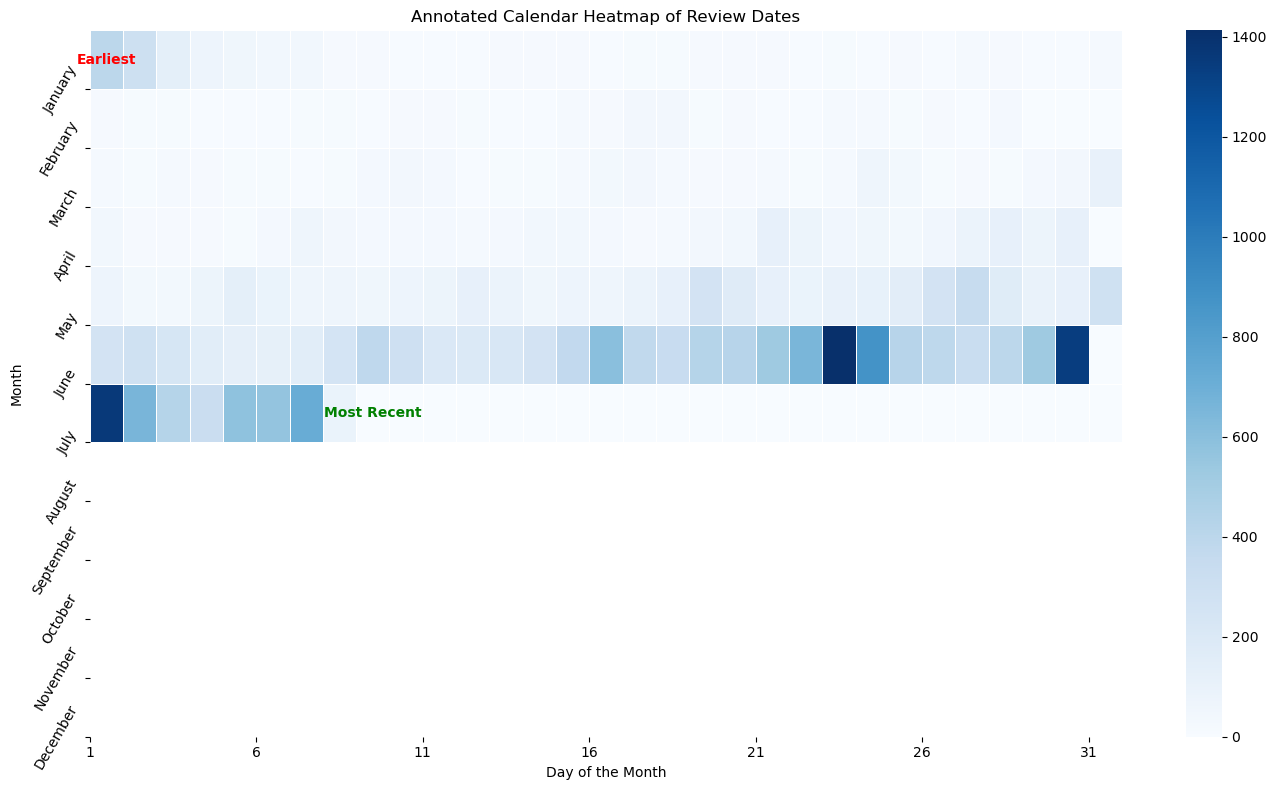

In [215]:
# Create a DataFrame to simulate more data for a heatmap
airbnb_last_review['year'] = airbnb_last_review['last_review'].dt.year
airbnb_last_review['month'] = airbnb_last_review['last_review'].dt.month
airbnb_last_review['day'] = airbnb_last_review['last_review'].dt.day

# Group data for heatmap by month and day (simulating review counts)
heatmap_data = airbnb_last_review.groupby(['month', 'day']).size().unstack(fill_value=0)

# Annotated Calendar Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.5, cbar=True, annot=False, fmt='d')

# Add annotations for earliest and most recent reviews
earliest_month, earliest_day = earliest_review.month, earliest_review.day
most_recent_month, most_recent_day = most_recent_review.month, most_recent_review.day

plt.text(earliest_day - 0.5, earliest_month - 0.5, "Earliest", color="red", ha="center", va="center", fontweight="bold")
plt.text(most_recent_day - 0.5, most_recent_month - 0.5, "Most Recent", color="green", ha="center", va="center", fontweight="bold")

# Format plot
plt.title("Annotated Calendar Heatmap of Review Dates")
plt.xlabel("Day of the Month")
plt.ylabel("Month")
plt.xticks(range(0, 32, 5), labels=[str(x) for x in range(1, 32, 5)])

# Rotate y-axis labels to prevent overlap
plt.yticks(range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=60)

plt.tight_layout()
plt.show()

# How many of the listings are private rooms?

To ensure consistency when comparing room type categories (e.g., treating "Private Room" and "private room" as the same), we first need to normalize the values in the dataset. This can be achieved by converting all entries in the room type column to lowercase using the `str.lower` method. This step is necessary before calculating the count of private rooms.

In [216]:
# before normalize
print("Before normalize:")
display(airbnb_room_type['room_type'].value_counts())

# normalize
airbnb_room_type['room_type'] = airbnb_room_type['room_type'].str.lower()

# after normalize
print("After normalize:")
display(airbnb_room_type['room_type'].value_counts())

Before normalize:


room_type
Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: count, dtype: int64

After normalize:


room_type
entire home/apt    13266
private room       11356
shared room          587
Name: count, dtype: int64

After we have normalized the `room_type` column, now we can use a condition to select rows where `room_type` equals "private room" to filter only the private rooms.

In [217]:
# Count of private rooms
private_rooms = airbnb_room_type[airbnb_room_type['room_type'] == 'private room'].shape[0]

print(private_rooms)

11356


Let's plot it in a bar chart to see the frequency for each room type.

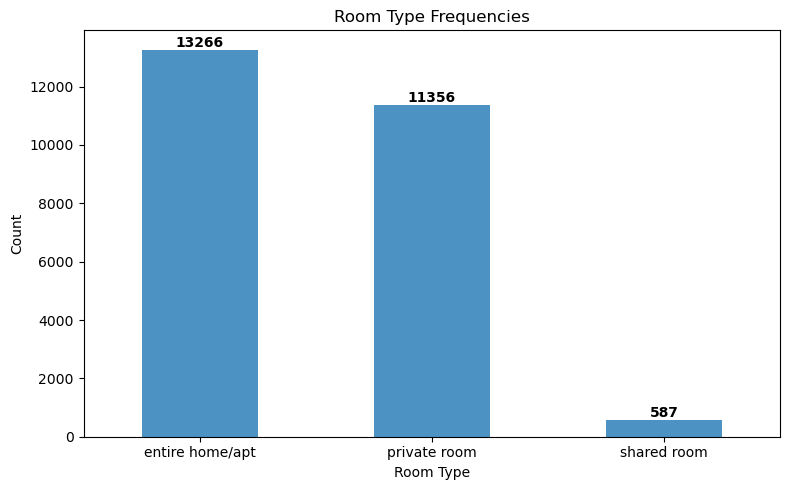

In [218]:
# Count all room types for a better comparison
room_counts = airbnb_room_type['room_type'].value_counts()

# Plot room type frequencies
plt.figure(figsize=(8, 5))
ax = room_counts.plot(kind="bar", alpha=0.8)
plt.title("Room Type Frequencies")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Add labels on top of each bar
for i, v in enumerate(room_counts):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontweight="bold")

plt.tight_layout()
plt.show()

The chart shows that there were **13,266** listings for **entire home/apt**, **587** listings for **shared rooms**, and **11,356** listings for **private rooms**.

# What is the average listing price?

Now, we're going to calculate the average listing price in the dataset.

Before doing this, we need to remove all the non-numeric characters from the `price` column, and then convert the numeric characters to float format.

In [219]:
print("Before removing non-numeric characters:")
display(airbnb_price.head())

# Remove non-numeric characters and convert to float
airbnb_price['price'] = airbnb_price['price'].str.replace(' dollars', '', regex=False).astype(float)

print("After removing non-numeric characters:")
display(airbnb_price.head())

Before removing non-numeric characters:


,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


After removing non-numeric characters:


,listing_id,price,nbhood_full
0,2595,225.0,"Manhattan, Midtown"
1,3831,89.0,"Brooklyn, Clinton Hill"
2,5099,200.0,"Manhattan, Murray Hill"
3,5178,79.0,"Manhattan, Hell's Kitchen"
4,5238,150.0,"Manhattan, Chinatown"


Now, we can find the average listing price using the `mean` function and round it to two decimal places using the `round` function.

In [220]:
# Average listing price
average_price = airbnb_price['price'].mean().round(2)

print(average_price)

141.78


This result tells us that the average listing price in airbnb is `141.78` dollar.

Let's plot it in histogram and box plot to see the distribution of listing `price`.

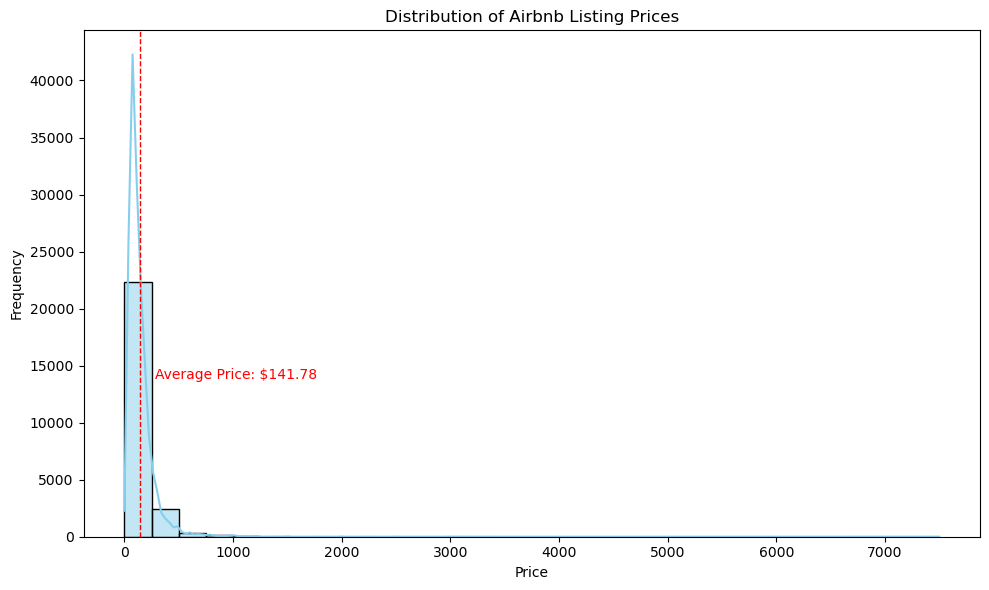

In [ ]:
# Plot the distribution of listing prices
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_price['price'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Add a vertical line for the average price
plt.axvline(average_price, color='red', linestyle='dashed', linewidth=1)
plt.text(average_price * 2, average_price * 100, f'Average Price: ${average_price}', color='red', va='center')

# Format plot
plt.title("Distribution of Airbnb Listing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

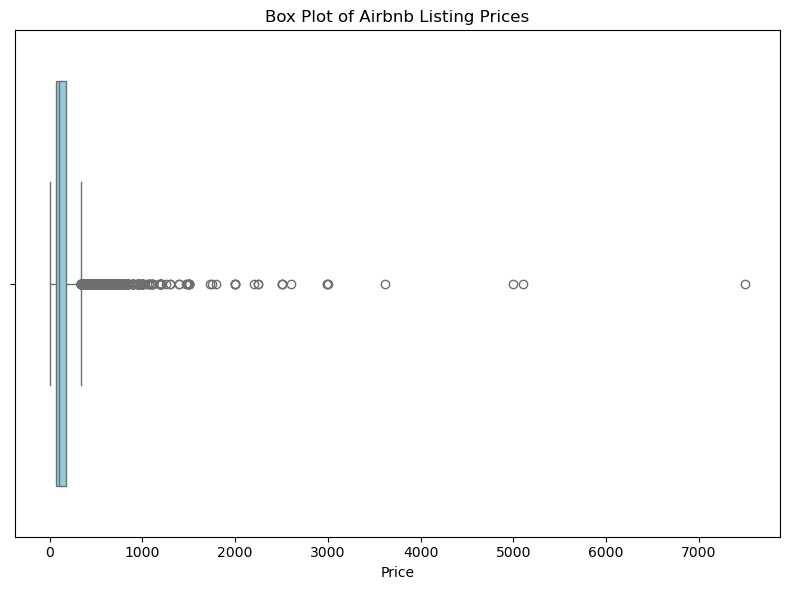

In [252]:
# Plotting the box plot for the price distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=airbnb_price['price'], color='skyblue')

# Add a title and labels
plt.title("Box Plot of Airbnb Listing Prices")
plt.xlabel("Price")

plt.tight_layout()
plt.show()

From these chart, we can see that the distribution is right-skewed, meaning the majority of listings have prices closer to the lower end, with a few very expensive listings causing the mean to be higher than the median. 

This suggests that while most Airbnb listings are affordable, there are a few luxury or exceptionally high-priced properties that could be distorting the overall average. The **$0** price point and **$7,500** maximum price should be further examined for possible errors or outliers to ensure a more accurate analysis of the general pricing trends.

# Combine the new variables into one DataFrame.

Finally, we can combine all of our calculations to a dataframe to make it easier to read.

In [253]:
# Combine into a DataFrame
review_dates = pd.DataFrame({
    'first_reviewed': [earliest_review],
    'last_reviewed': [most_recent_review],
    'nb_private_rooms': [private_rooms],
    'avg_price': [average_price]
})

review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78


The first review date in this Airbnb listing dataset is **2019-01-01**, and the most recent review date is **2019-07-09**.

Additionally, there are **11,356** private rooms listed, and an average listing price of **$141.78**.